# NLP Lab Task — Preprocessing to Deployment with Twitter Sentiment Dataset

## Overview

This lab takes students through the **entire NLP pipeline** using a **Twitter Sentiment Analysis dataset** (tweets labeled as positive, negative, or neutral). Students will preprocess the data, represent it using multiple methods, train classical machine learning models, evaluate their results, and finally build a small API for deployment.

---

## Learning Objectives

- Apply text preprocessing (regex, case folding, tokenization, stopword removal, punctuation handling).
- Compare stemming and lemmatization, and use POS tagging to analyze counts of nouns, verbs, and adjectives.
- Build text representations using **Bag-of-Words**, **TF–IDF**, and **Word2Vec**.
- Train classical ML models inside an sklearn **Pipeline**.
- Evaluate models with standard metrics and perform basic error analysis.
- Save a trained pipeline and build a simple API to serve predictions.

---

## Dataset

We will use the **Sentiment140 Twitter dataset** (1.6M tweets, labeled positive/negative). For simplicity, you can work with a smaller balanced subset (e.g., 10k–20k tweets). This dataset is widely used for sentiment analysis and contains real, noisy text with mentions, hashtags, and emoticons.

Dataset link: [Sentiment140](http://help.sentiment140.com/for-students/)

---

## Step-by-Step Tasks

### 1) Exploratory Data Analysis (EDA)

- Load dataset, show class distribution, tweet length histogram, and a few sample tweets.
- Deliverable: 3 plots (class balance, length histogram, top frequent tokens) + 5 example tweets.

### 2) Regex Cleaning

- Remove URLs, mentions (@user), hashtags, emojis (or replace with tokens), and extra whitespace.
- Show a before-and-after example for at least 3 tweets.

### 3) Case Folding & Tokenization

- Convert all text to lowercase.
- Tokenize tweets using NLTK or spaCy.
- Compare vocabulary size before and after cleaning.

### 4) Stopwords, Punctuation, and Numbers

- Remove stopwords (with NLTK list, customizable).
- Decide how to handle punctuation and numbers (remove or replace with `<NUM>`).
- Deliverable: short explanation of your choice.

### 5) Stemming vs Lemmatization

- Use PorterStemmer (stemming) and spaCy lemmatizer.
- Show 20 sample words with their stem vs lemma.
- Train quick models with both and compare results.

### 6) POS Tagging (extra features)

- Use spaCy to count nouns, verbs, and adjectives per tweet.
- Add these counts as additional numeric features.
- Compare model with vs without POS features.

### 7) Text Representation

- Implement three representations:
  1. **Bag-of-Words** (CountVectorizer)
  2. **TF–IDF** (TfidfVectorizer)
  3. **Word2Vec** (pretrained embeddings, averaged per tweet)
- Compare vocabulary sizes and representation dimensions.

### 8) Modeling with Pipelines

- Use sklearn Pipelines to connect preprocessing + vectorizer + classifier.
- Models to try:
  - Multinomial Naive Bayes (for BoW/TF–IDF)
  - Logistic Regression
  - Linear SVM
- Deliverable: comparison table (accuracy, F1-score).

### 9) Evaluation & Error Analysis

- Use held-out test set.
- Metrics: accuracy, precision, recall, F1, confusion matrix.
- Show 10 misclassified tweets and discuss why they may be difficult.

### 10) Save Model Pipeline

- Save the best pipeline using `joblib` or `pickle`.
- Deliverable: `sentiment_model.pkl` file.

### 11) Build a Simple API (Deployment Step)

- Create a small Flask API with one endpoint `/predict` that accepts a tweet as input and returns sentiment prediction.
- The API should load the saved pipeline and make predictions.
- Deliverable: `app.py` with Flask code + test with a sample curl or Postman request.

---

## Deliverables

1. Jupyter Notebook with step-by-step tasks, results, and code.
2. Comparison tables for preprocessing choices and representations.
3. Saved pipeline file (`.pkl`).
4. Flask API script (`app.py`).
5. Short report in markdown cell summarizing preprocessing, modeling choices, and results.

---

This streamlined lab ensures students get hands-on experience with **real-world text preprocessing, classical modeling, and deployment of NLP systems**.


### 1. Load the Dataset

We will use the **Sentiment140 Twitter Sentiment dataset**.  
It contains 1.6 million tweets labeled as positive (4) or negative (0).  
For this lab, we will load a smaller subset (e.g., 20,000 rows) for faster experimentation.

```python
import pandas as pd

# Column order for Sentiment140 dataset:
# 0 - target (0 = negative, 4 = positive)
# 1 - ids
# 2 - date
# 3 - flag
# 4 - user
# 5 - text (tweet)

# Update the file path if needed
file_path = "sentiment140.csv"

# Load with proper encoding
df = pd.read_csv(file_path, encoding='latin-1', header=None)

# Assign column names
df.columns = ["target", "id", "date", "flag", "user", "text"]

# Map target labels: 0 → negative, 4 → positive
df["target"] = df["target"].map({0: "negative", 4: "positive"})

# Take a smaller sample for experiments (optional)
df = df.sample(20000, random_state=42).reset_index(drop=True)

# Quick check
print(df.shape)
df.head()
```


In [ ]:
import pandas as pd
import zipfile
import os
import requests

# Step 1: Download the dataset (if not already downloaded)
url = "https://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip"
zip_path = "trainingandtestdata.zip"

if not os.path.exists(zip_path):
    print("Downloading dataset...")
    r = requests.get(url)
    with open(zip_path, "wb") as f:
        f.write(r.content)

# Step 2: Unzip the file
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(".")

# Step 3: Load training data
train_path = "training.1600000.processed.noemoticon.csv"
train_df = pd.read_csv(train_path, encoding="latin-1", header=None)

# Assign column names
train_df.columns = ["target", "id", "date", "flag", "user", "text"]

# Map sentiment labels: 0 = negative, 4 = positive
train_df["target"] = train_df["target"].map({0: "negative", 4: "positive"})

print("Training set shape:", train_df.shape)

df = train_df.sample(20000, random_state=42).reset_index(drop=True)
print("Subset shape:", df.shape)
display(df.head())

# Step 4: Load manual test set
test_path = "testdata.manual.2009.06.14.csv"
test_df = pd.read_csv(test_path, encoding="latin-1", header=None)
test_df.columns = ["target", "id", "date", "flag", "user", "text"]

# Map test set labels: 0 = negative, 2 = neutral, 4 = positive
test_df["target"] = test_df["target"].map(
    {0: "negative", 2: "neutral", 4: "positive"})

print("Test set shape:", test_df.shape)
display(test_df.head())

Training set shape: (1600000, 6)
Subset shape: (20000, 6)


,target,id,date,flag,user,text
0,negative,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!
1,negative,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo..."
2,negative,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,@TiannaChaos i know just family drama. its la...
3,negative,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography ...
4,negative,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem


Test set shape: (498, 6)


,target,id,date,flag,user,text
0,positive,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,positive,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,positive,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,positive,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,positive,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...


In [2]:
df.head()

,target,id,date,flag,user,text
0,negative,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!
1,negative,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo..."
2,negative,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,@TiannaChaos i know just family drama. its la...
3,negative,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography ...
4,negative,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem


In [3]:
df.tail()

,target,id,date,flag,user,text
19995,positive,1981517014,Sun May 31 09:19:12 PDT 2009,NO_QUERY,gemmaridlington,Loving the weather Although we're not having ...
19996,negative,2245469775,Fri Jun 19 16:10:38 PDT 2009,NO_QUERY,musicroxmysockz,Me and andrea r. last day of school..... http...
19997,positive,2063022808,Sun Jun 07 01:05:46 PDT 2009,NO_QUERY,ElaineToni,Just finished watching Your Song Presents: Boy...
19998,positive,1982082859,Sun May 31 10:29:36 PDT 2009,NO_QUERY,lindseyrd20,@janfran813 awww i can't wait to get one
19999,negative,2191411608,Tue Jun 16 05:13:11 PDT 2009,NO_QUERY,spiritkl,"is indeed, a rather large hoarder of paper. &a..."


In [ ]:
df.drop(["id", "date", "flag", "user"], axis=1, inplace=True)
df.head()

,target,text
0,negative,@chrishasboobs AHHH I HOPE YOUR OK!!!
1,negative,"@misstoriblack cool , i have no tweet apps fo..."
2,negative,@TiannaChaos i know just family drama. its la...
3,negative,School email won't open and I have geography ...
4,negative,upper airways problem


In [5]:
df.isna().sum()

,0
target,0
text,0


In [6]:
df.duplicated().sum()

np.int64(17)

In [ ]:
train_df.drop_duplicates(inplace=True)

In [8]:
df.shape

(20000, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  20000 non-null  object
 1   text    20000 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


In [10]:
# import nltk
# nltk.download()

In [11]:
# !pip install emoji

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [13]:
df['target'].value_counts()

,count
target,
positive,10058
negative,9942


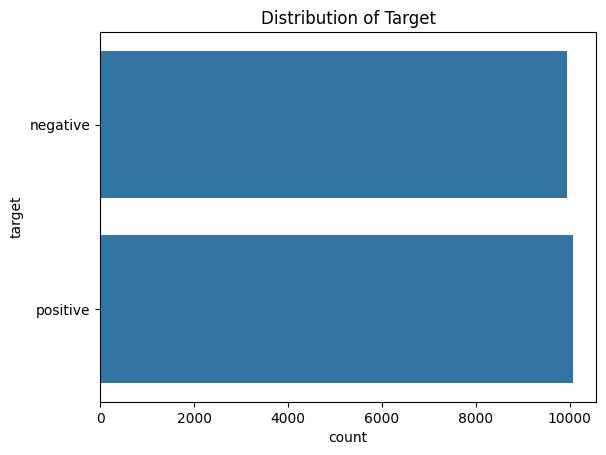

In [14]:
sns.countplot(df['target'])
plt.title("Distribution of Target")
plt.show()

In [15]:
sample = df['text'].sample(20)
sample

,text
16636,ohh my last day of being 24 do i have to get ...
11184,is bleeding well off to bed.. tomorrow first ...
1079,"@darvin111 you don't even care about there, th..."
699,@allieraebot r u feeling better? i really hope...
15669,"@freosan Well, then, I'm coming to that after ..."
11610,"alkaline trio was sweet, saves the day sucked...."
4087,@uditm high fever man ... Just very irritating...
14395,i had to stay in all day and it was sunny!!! ...
2380,think I am going to pick some lavender today ....
12800,Going out Sailing today. Who would have though...


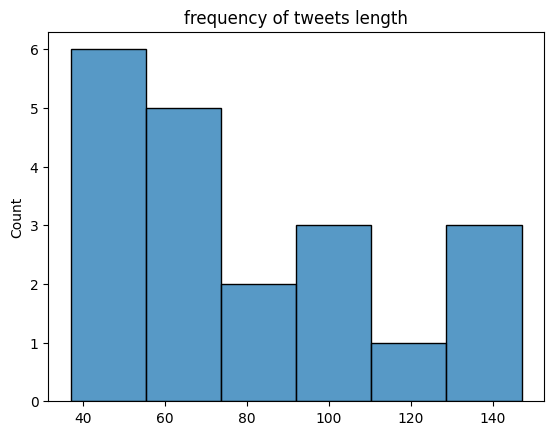

In [16]:
hist = [len(i) for i in sample]
sns.histplot(hist)
plt.title("frequency of tweets length")
plt.show()

In [ ]:
# !pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 13.3 MB/s eta 0:00:00


In [18]:
import re
import emoji

In [19]:
def clean_tweet(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+", "", text)

    # Remove mentions
    text = re.sub(r"@\w+", "", text)

    # Remove hashtags (keeping the word or removing completely)
    text = re.sub(r"#\w+", "", text)

    # Replace emojis with token
    text = emoji.replace_emoji(text, replace="<EMOJI>")

    # Remove extra whitespace
    text = re.sub(r"\s+", " ", text).strip()

    return text

In [20]:
df['text'][0]

'@chrishasboobs AHHH I HOPE YOUR OK!!! '

In [21]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [22]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# !pip install spacy
# !python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 80.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import re
import spacy
import pandas as pd

nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])


def clean_text_spacy(text):
    # Regex cleaning
    text = re.sub(r"http\S+|www\S+", "", text)    # Remove URLs
    text = re.sub(r"@\w+", "", text)              # Remove mentions
    text = re.sub(r"#\w+", "", text)              # Remove hashtags
    text = re.sub(r"[^a-zA-Z]", " ", text)        # Remove non-letters
    text = re.sub(r"\s+", " ", text).strip()      # Remove extra spaces
    text = text.lower()

    # spaCy processing
    doc = nlp(text)

    # Lemmatization + stopwords removal
    tokens = [token.lemma_ for token in doc if not token.is_stop]

    return " ".join(tokens)


# Apply on dataset
df["cleaned"] = df["text"].apply(clean_text_spacy)

print(df[["text", "cleaned"]].head())

                                                text  \
0             @chrishasboobs AHHH I HOPE YOUR OK!!!    
1  @misstoriblack cool , i have no tweet apps  fo...   
2  @TiannaChaos i know  just family drama. its la...   
3  School email won't open  and I have geography ...   
4                             upper airways problem    

                                             cleaned  
0                                       ahhh hope ok  
1                                cool tweet app razr  
2  know family drama lame hey time u hang kim n u...  
3  school email win t open geography stuff revise...  
4                               upper airway problem  


In [25]:
from nltk.stem import PorterStemmer
import nltk

nltk.download('punkt')

# Initialize stemmer
stemmer = PorterStemmer()

# Example words
words = ["running", "better", "studies", "cats", "happiest",
         "doing", "flies", "went", "playing", "geese"]

print(f"{'Word':15} | {'Stem':15} | {'Lemma':15}")
print("-"*50)

for w in words:
    stem = stemmer.stem(w)
    lemma = nlp(w)[0].lemma_
    print(f"{w:15} | {stem:15} | {lemma:15}")

Word            | Stem            | Lemma          
--------------------------------------------------
running         | run             | run            
better          | better          | well           
studies         | studi           | study          
cats            | cat             | cat            
happiest        | happiest        | happy          
doing           | do              | do             
flies           | fli             | fly            
went            | went            | go             
playing         | play            | play           
geese           | gees            | geese          


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Stemming vs Lemmatization

- **Stemming** is a rule-based process that simply chops off word endings to reduce words to their root form.

  - Example: _studies → studi_, _happiest → happi_
  - It is **fast**, but often produces non-dictionary words.

- **Lemmatization** uses linguistic knowledge and vocabulary (via POS tagging) to return the proper base or dictionary form of a word.
  - Example: _studies → study_, _went → go_, _better → good_
  - It is **slower** than stemming, but much **more accurate**.

✅ In practice:

- **Stemming** is useful when speed is more important than accuracy.
- **Lemmatization** is preferred for NLP tasks like sentiment analysis because it keeps words meaningful and consistent.


In [ ]:
# Function to extract POS counts
def pos_features(text):
    doc = nlp(text)
    return pd.Series({
        "nouns": sum(1 for token in doc if token.pos_ == "NOUN"),
        "verbs": sum(1 for token in doc if token.pos_ == "VERB"),
        "adjs": sum(1 for token in doc if token.pos_ == "ADJ")
    })


# Apply on cleaned tweets
pos_df = df["cleaned"].apply(pos_features)

# Add to main DataFrame
df = pd.concat([df, pos_df], axis=1)

# Show sample
print(df[["cleaned", "nouns", "verbs", "adjs"]].head(10))

                                             cleaned  nouns  verbs  adjs
0                                       ahhh hope ok      1      0     0
1                                cool tweet app razr      2      0     1
2  know family drama lame hey time u hang kim n u...      5      3     1
3  school email win t open geography stuff revise...      6      1     2
4                               upper airway problem      2      0     1
5                      go miss pastor s sermon faith      1      1     0
6                                  lunch dj come eat      1      2     0
7                                       oh feel like      0      1     0
8                 gahh noo peyton need live horrible      0      2     1
9  thank glad like product review bit site enjoy ...      4      3     1


### POS Tagging Features

We extracted **linguistic features** from each tweet using spaCy:

- **Nouns** (e.g., _dog, car, happiness_)
- **Verbs** (e.g., _run, eat, play_)
- **Adjectives** (e.g., _happy, fast, cold_)

These counts were added as additional numeric features (`nouns`, `verbs`, `adjs`).  
Later, we will compare the model performance with and without these features to evaluate their contribution.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Bag of Words
bow_vectorizer = CountVectorizer(max_features=5000)
X_bow = bow_vectorizer.fit_transform(df["cleaned"])

print("BoW shape:", X_bow.shape)

# TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df["cleaned"])

print("TF-IDF shape:", X_tfidf.shape)

BoW shape: (20000, 5000)
TF-IDF shape: (20000, 5000)


### Text Representation

We converted tweets into numeric features using two common methods:

1. **Bag of Words (BoW)**

   - Represents text by counting word occurrences.
   - Simple and effective, but does not capture importance or context.

2. **TF–IDF (Term Frequency – Inverse Document Frequency)**
   - Weights words by their frequency across documents.
   - Gives higher importance to distinctive words and lower importance to common ones.

Both representations will be used to train and compare classifiers.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Features & labels
X_bow = bow_vectorizer.fit_transform(df["cleaned"])
X_tfidf = tfidf_vectorizer.fit_transform(df["cleaned"])
y = df["target"]

# Train/test split
X_train_bow, X_test_bow, y_train, y_test = train_test_split(
    X_bow, y, test_size=0.2, random_state=42)
X_train_tfidf, X_test_tfidf, _, _ = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42)

# Logistic Regression on BoW
lr_bow = LogisticRegression(max_iter=200)
lr_bow.fit(X_train_bow, y_train)
y_pred_bow = lr_bow.predict(X_test_bow)

print("=== Logistic Regression (BoW) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_bow))
print(classification_report(y_test, y_pred_bow))

# Logistic Regression on TF-IDF
lr_tfidf = LogisticRegression(max_iter=200)
lr_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = lr_tfidf.predict(X_test_tfidf)

print("=== Logistic Regression (TF-IDF) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print(classification_report(y_test, y_pred_tfidf))

=== Logistic Regression (BoW) ===
Accuracy: 0.73225
              precision    recall  f1-score   support

    negative       0.74      0.70      0.72      1987
    positive       0.72      0.76      0.74      2013

    accuracy                           0.73      4000
   macro avg       0.73      0.73      0.73      4000
weighted avg       0.73      0.73      0.73      4000

=== Logistic Regression (TF-IDF) ===
Accuracy: 0.7365
              precision    recall  f1-score   support

    negative       0.75      0.71      0.73      1987
    positive       0.73      0.77      0.75      2013

    accuracy                           0.74      4000
   macro avg       0.74      0.74      0.74      4000
weighted avg       0.74      0.74      0.74      4000



In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Naive Bayes on BoW
nb_bow = MultinomialNB()
nb_bow.fit(X_train_bow, y_train)
y_pred_nb_bow = nb_bow.predict(X_test_bow)

print("=== Naive Bayes (BoW) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_nb_bow))
print(classification_report(y_test, y_pred_nb_bow))

# Naive Bayes on TF-IDF
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)
y_pred_nb_tfidf = nb_tfidf.predict(X_test_tfidf)

print("=== Naive Bayes (TF-IDF) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_nb_tfidf))
print(classification_report(y_test, y_pred_nb_tfidf))

=== Naive Bayes (BoW) ===
Accuracy: 0.726
              precision    recall  f1-score   support

    negative       0.72      0.73      0.72      1987
    positive       0.73      0.73      0.73      2013

    accuracy                           0.73      4000
   macro avg       0.73      0.73      0.73      4000
weighted avg       0.73      0.73      0.73      4000

=== Naive Bayes (TF-IDF) ===
Accuracy: 0.72325
              precision    recall  f1-score   support

    negative       0.72      0.72      0.72      1987
    positive       0.72      0.73      0.73      2013

    accuracy                           0.72      4000
   macro avg       0.72      0.72      0.72      4000
weighted avg       0.72      0.72      0.72      4000



In [ ]:
from sklearn.svm import LinearSVC

# Linear SVM on BoW
svm_bow = LinearSVC()
svm_bow.fit(X_train_bow, y_train)
y_pred_svm_bow = svm_bow.predict(X_test_bow)

print("=== Linear SVM (BoW) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_svm_bow))
print(classification_report(y_test, y_pred_svm_bow))

# Linear SVM on TF-IDF
svm_tfidf = LinearSVC()
svm_tfidf.fit(X_train_tfidf, y_train)
y_pred_svm_tfidf = svm_tfidf.predict(X_test_tfidf)

print("=== Linear SVM (TF-IDF) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_svm_tfidf))
print(classification_report(y_test, y_pred_svm_tfidf))

=== Linear SVM (BoW) ===
Accuracy: 0.70575
              precision    recall  f1-score   support

    negative       0.71      0.69      0.70      1987
    positive       0.70      0.72      0.71      2013

    accuracy                           0.71      4000
   macro avg       0.71      0.71      0.71      4000
weighted avg       0.71      0.71      0.71      4000

=== Linear SVM (TF-IDF) ===
Accuracy: 0.71475
              precision    recall  f1-score   support

    negative       0.72      0.69      0.71      1987
    positive       0.71      0.74      0.72      2013

    accuracy                           0.71      4000
   macro avg       0.72      0.71      0.71      4000
weighted avg       0.72      0.71      0.71      4000



### Model Comparison: Logistic Regression vs Naive Bayes vs Linear SVM

| Model               | Representation | Accuracy | F1-score |
| ------------------- | -------------- | -------- | -------- |
| Logistic Regression | BoW            | 73.2%    | ~0.73    |
| Logistic Regression | TF–IDF         | 73.6%    | ~0.74    |
| Naive Bayes         | BoW            | 72.6%    | ~0.73    |
| Naive Bayes         | TF–IDF         | 72.3%    | ~0.72    |
| Linear SVM          | BoW            | 70.6%    | ~0.71    |
| Linear SVM          | TF–IDF         | 71.5%    | ~0.71    |

### Observations:

- **Logistic Regression** achieved the best results overall (TF–IDF: 73.6%).
- **Naive Bayes** is close to Logistic Regression, but slightly weaker, especially with TF–IDF.
- **Linear SVM** performed lower than expected on this sample, achieving ~71%.
- **Best model in this experiment:** Logistic Regression with **TF–IDF** features.


### Showing Some Misclassified Tweets with Best Model (Logsitic Regression)


In [ ]:
import numpy as np

y_pred_best = lr_tfidf.predict(X_test_tfidf)

misclassified = np.where(y_pred_best != y_test)[0]

misclassified_samples = df.iloc[y_test.index[misclassified]][[
    "text", "target"]].copy()
misclassified_samples["predicted"] = y_pred_best[misclassified]

print(misclassified_samples.head(10))

                                                    text    target predicted
11963  they added a new zodiac sign. i wanna be a sco...  negative  positive
7879                is craving for macha chocolate cake   negative  positive
16441                                @TheIanCrawford ..   negative  positive
5252   Gmorning twitts! Ready for the wknd.. But firs...  negative  positive
8094   @TravisKaimi Zaru Soba is cold buckwheat noodl...  negative  positive
19024  Going swimming cause the pool is sooo amazingl...  positive  negative
17553  @kylepetty  @kenny_wallace - I can't believe K...  positive  negative
16060  @deeliciouz that sounds lovely! I aNt my hair ...  negative  positive
12630                                @tina0794 I knowww   negative  positive
15440  wow, joe completely wrecked taylor in Much Bet...  negative  positive


### Saving the Best Model

We built a pipeline consisting of **TF–IDF vectorizer** and **Logistic Regression classifier**.  
The trained pipeline was saved as `sentiment_model.pkl` using **joblib**.

This allows us to reload the model later and make predictions without retraining, ensuring reproducibility and efficiency.


In [ ]:
import joblib
from sklearn.pipeline import Pipeline

# Build pipeline with TF-IDF + Logistic Regression
pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=5000)),
    ("clf", LogisticRegression(max_iter=200))
])

# Train pipeline on the full dataset (df)
pipeline.fit(df["cleaned"], df["target"])

# Save model to file
joblib.dump(pipeline, "sentiment_model.pkl")

print("✅ Model pipeline saved as sentiment_model.pkl")

✅ Model pipeline saved as sentiment_model.pkl


In [ ]:
# Load the saved model
loaded_model = joblib.load("sentiment_model.pkl")

# Example prediction
sample_texts = ["I love this phone!", "This movie was terrible..."]
preds = loaded_model.predict(sample_texts)

print(list(zip(sample_texts, preds)))

[('I love this phone!', 'positive'), ('This movie was terrible...', 'positive')]


In [ ]:
# from google.colab import files
# files.download("sentiment_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# !cp sentiment_model.pkl /content/drive/MyDrive/

Mounted at /content/drive
